In [9]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# $k-nearest-neighbors$ 

**Topics**
* Algo (machine learning)
* matplotlib
* numpy

## 1 handle data

In [50]:
def loadDataset(filename, split, trainingSet = [], testSet = [], irisSet = []):
    with open(filename, 'rb') as cvsfile:
        lines = csv.reader(cvsfile)
        dataset = list(lines)
        for data in dataset:
            data[:-1] = map(float, data[:-1])
            irisSet.append(data)
            if random.random() < split:
                trainingSet.append(data)
            else:
                testSet.append(data)
        return trainingSet, testSet, irisSet

trainingSet, testSet, irisSet = loadDataset('iris.txt',0.66)

feat = ['sepal length', 'sepal width', 'petal length', 'petal width']

print trainingSet[:10], '\n'
print len(trainingSet), len(testSet)

[[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'], [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'], [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'], [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'], [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'], [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'], [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'], [5.1, 3.5, 1.4, 0.3, 'Iris-setosa']] 

94 56


In [51]:
setoa = [d[:-1] for d in irisSet if d[-1] == 'Iris-setosa']
versicolor = [d[:-1] for d in irisSet if d[-1] == 'Iris-versicolor']
virginica = [d[:-1] for d in irisSet if d[-1] == 'Iris-virginica']

## 2 numpy

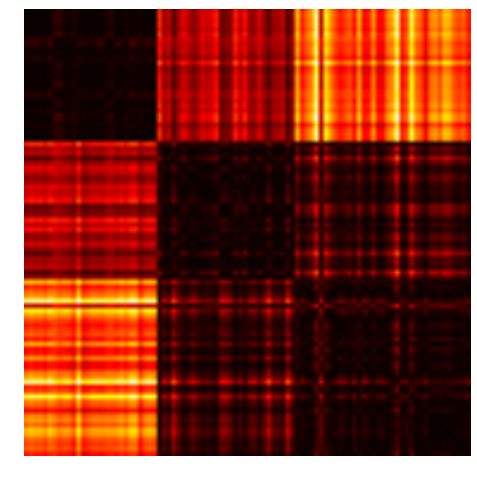

In [52]:
name = [elem[-1] for elem in trainingSet]
value = [elem[:-1] for elem in trainingSet]

len_data = len(name)
len_para = len(value[0])

data = np.array(value)

# broadcasting to get difference between different pair of dimension:
diff = data.reshape(len_data, 1, len_para) - data         # diff.shape = (len_data,len_data,len_para)

# Aggregate to find pairwise (euclidian-)distances
# (axis=2)
D = (diff**2).sum(2)      # D.shape = (len_data, len_data)

fig =plt.figure(figsize=(8,8))

x = np.arange(len_data)
y = np.arange(len_data)
x, y = np.meshgrid(x, y)
#scat = plt.scatter(x,y,D, alpha=0.5)
plt.imshow(D)
plt.axis('off')
plt.set_cmap('hot')

Symetric: Can we divide computation by 2 ?

In [53]:
seto = np.array(setoa, dtype=float)
versicolo = np.array(versicolor, dtype=float)
virginic = np.array(virginica, dtype=float)

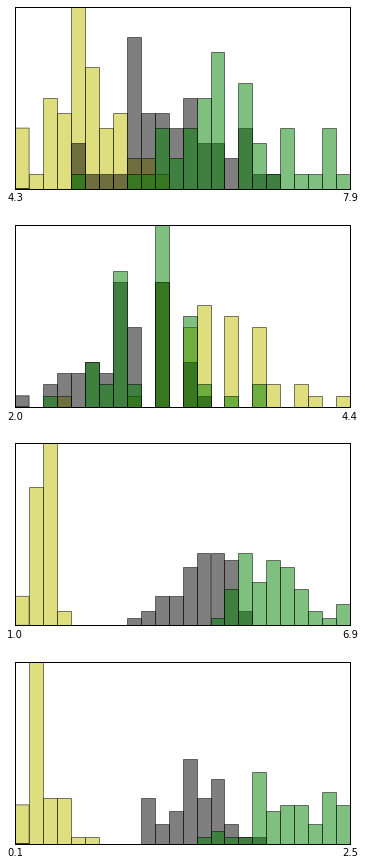

In [54]:
plt.clf()

fig, axes = plt.subplots(4,1)
fig.set_figheight(15)

for i, ax in enumerate(axes):
    m = min(min(seto[:,i]), min(versicolo[:,i]), min(virginic[:,i]))
    M = max(max(seto[:,i]), max(versicolo[:,i]), max(virginic[:,i]))
    ax.xaxis.set_ticks([m, M])
    ax.yaxis.set_ticks([])
    l = np.linspace(m, M, 25)
    ax.hist(seto[:,i], l, color='y', alpha=0.5)
    ax.hist(versicolo[:,i], l, color='k', alpha=0.5)
    ax.hist(virginic[:,i], l, color='g', alpha=0.5)

plt.show()

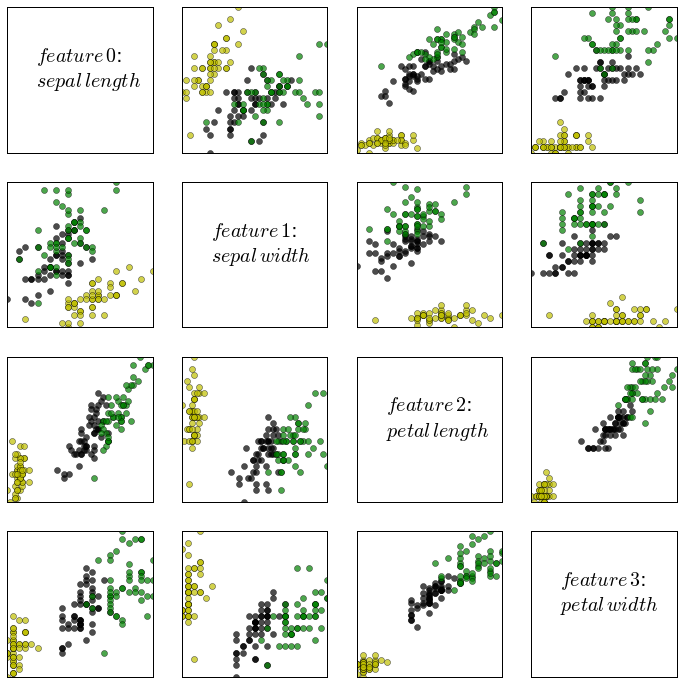

In [56]:
fig, axes = plt.subplots(4,4, figsize=(12,12))

gen = ((i, j) for i in range(4) for j in range(4))

def plot_ij(ax, i, j):
    ax.plot(seto[:,i], seto[:,j], 'yo', alpha=0.7)
    ax.plot(versicolo[:,i], versicolo[:,j], 'ko', alpha=0.7)
    ax.plot(virginic[:,i], virginic[:,j], 'go', alpha=0.7)

def plot_ii(ax, i):
    x = ax.get_xlim()[1]
    y = ax.get_ylim()[1]
    ax.text(0.2,0.45, '$feature\, {0}$:\n${1}$'.format(i, feat[i].replace(' ', '\, ')), fontsize=20)
#    ax.set_title('$feature\, {0}$'.format(i), fontsize=20)
#    ax.hist(seto[:,i], 15, color='y', alpha=0.3)
#    ax.hist(virginic[:,i], 15, color='g', alpha=0.3)
#    ax.hist(versicolo[:,i], 15, color='k', alpha=0.3)
    
for i, j in gen:
    ax = axes[i][j]
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    if i==j: plot_ii(ax, i)
    else: plot_ij(ax,i, j)

In [141]:
ax.axis??

In [ ]:
a =np.linspace

In [ ]:
# set diagonal to infinity to skip self-neighbors
i = np.arange(len_data)
D[i, i] = np.inf

In [502]:
from math import sqrt, pow

def euclideanDistance(x, y):
    d = 0
    for i,j in zip(x[:-1],y[:-1]):
        d += pow((i - j), 2)
    return sqrt(d)

d1 = [0,1,0,'a']
d2 = [1,1,1,'b']
euclideanDistance(d1,d2)

1.4142135623730951

#### Reference

In [7]:
l1 = ['aaa']
l2 = ['aaa']

b = 'aaa'

c = 'aa'

print l1[0] is l2[0]
print l1 is l2
print l1 == l2

print l1[0] is b
print c is b[1:]
print c is b[:-1]
print c == b[:-1]

True
False
True
True
False
False
True


In [8]:
l1 = [[1,2], [3,4]]
l2 = l1
l3 = l1[:]

print l2 is l1
print l3 is l1
print l2 == l1

True
False
True


In [4]:
l1 = [[1,2], [3,4]]
l2 = [[1,2], [3,4],[5,6]]

print l2[:-1] == l1

True
